# ADA Project: 2018's Best hit Recipe 🎙🎵

In [1]:
import numpy as np
import pandas as pd

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob
import time
import csv

import h5py
import hdf5_getters
from hdf5_getters import *

from operator import methodcaller

In [28]:
def count_all_files(base_directory, ext='.h5') :
    cnt = 0
    for root, dirs, files in os.walk(base_directory):
        files = glob.glob(os.path.join(root,'*'+ext))
        cnt += len(files)
    return cnt

In [29]:
def get_all(getter, base_directory, ext='.h5'):
    values = []
    for root, dirs, files in os.walk(base_directory):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            h5 = hdf5_getters.open_h5_file_read(f)
            values.append( getter(h5) )
            h5.close()
    return values

In [30]:
def get_file_fields(file, all_getters):
    fields = []
    for getter_name in all_getters:
        getter = getattr(hdf5_getters, getter_name)
        fields.append(getter(h5))
    return fields

In [2]:
base_directory = './millionsongsubset_full/MillionSongSubset/data'

In [32]:
print('Number of songs:', count_all_files(base_directory))

Number of songs: 10000


In [3]:
all_getters = list(filter(lambda x: x[:3] == 'get',hdf5_getters.__dict__.keys()))
print(all_getters)
print('Number of getters:', len(all_getters))

['get_num_songs', 'get_artist_familiarity', 'get_artist_hotttnesss', 'get_artist_id', 'get_artist_mbid', 'get_artist_playmeid', 'get_artist_7digitalid', 'get_artist_latitude', 'get_artist_longitude', 'get_artist_location', 'get_artist_name', 'get_release', 'get_release_7digitalid', 'get_song_id', 'get_song_hotttnesss', 'get_title', 'get_track_7digitalid', 'get_similar_artists', 'get_artist_terms', 'get_artist_terms_freq', 'get_artist_terms_weight', 'get_analysis_sample_rate', 'get_audio_md5', 'get_danceability', 'get_duration', 'get_end_of_fade_in', 'get_energy', 'get_key', 'get_key_confidence', 'get_loudness', 'get_mode', 'get_mode_confidence', 'get_start_of_fade_out', 'get_tempo', 'get_time_signature', 'get_time_signature_confidence', 'get_track_id', 'get_segments_start', 'get_segments_confidence', 'get_segments_pitches', 'get_segments_timbre', 'get_segments_loudness_max', 'get_segments_loudness_max_time', 'get_segments_loudness_start', 'get_sections_start', 'get_sections_confidence'

#### Building the dataframe (only subset)

*note: skip this section if the dataframe has  already been saved to .csv*

In [34]:
#iterate over all the .h5 files, starting from the base directory
#note: takes between ~8 to ~10 minutes
start_time = time.time()

values = []
ext = '.h5'

for root, dirs, files in os.walk(base_directory):
    files = glob.glob(os.path.join(root, '*'+ext))
    for f in files:
        h5 = hdf5_getters.open_h5_file_read(f)
        values.append(get_file_fields(h5, all_getters))
        h5.close()        

print("--- Execution time: %s seconds ---" % (time.time() - start_time))

--- Execution time: 610.5978236198425 seconds ---


In [35]:
#create the column names from the getter names
#strip the name of 'get_'
column_names = [name[4:].replace('_', ' ') for name in all_getters]
#column_names = []
#for getter_name in all_getters:
#    column_names.append(getter_name[4:].replace('_', ' '))

In [36]:
#create a dataframe with the given column names
data = pd.DataFrame(columns=column_names)
data.head()

--- Execution time: 0.01060795783996582 seconds ---


,num songs,artist familiarity,artist hotttnesss,artist id,artist mbid,artist playmeid,artist 7digitalid,artist latitude,artist longitude,artist location,...,sections confidence,beats start,beats confidence,bars start,bars confidence,tatums start,tatums confidence,artist mbtags,artist mbtags count,year


In [37]:
#fill the dataframe row by row
start_time = time.time()
nb_entries = len(values)
for i in range(0, nb_entries):
    data.loc[i] = values[i]
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

In [38]:
data.head()

,num songs,artist familiarity,artist hotttnesss,artist id,artist mbid,artist playmeid,artist 7digitalid,artist latitude,artist longitude,artist location,...,sections confidence,beats start,beats confidence,bars start,bars confidence,tatums start,tatums confidence,artist mbtags,artist mbtags count,year
0,1,0.581794,0.401998,b'ARD7TVE1187B99BFB1',b'e77e51a5-4761-45b3-9847-2051f811e366',4479,165270,NaN,NaN,b'California - LA',...,"[1.0, 1.0, 0.218, 0.133, 0.384, 0.326, 0.373, ...","[0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...","[0.834, 0.851, 0.65, 0.635, 0.532, 0.753, 0.62...","[0.58521, 2.94247, 5.14371, 7.74554, 10.36149,...","[0.643, 0.746, 0.722, 0.095, 0.091, 0.362, 0.4...","[0.28519, 0.58521, 0.89422, 1.19196, 1.49119, ...","[0.779, 0.734, 0.674, 0.637, 0.597, 0.532, 0.4...",[],[],0
1,1,0.630630,0.417500,b'ARMJAGH1187FB546F3',b'1c78ab62-db33-4433-8d0b-7c8dcf1849c2',22066,1998,35.14968,-90.04892,"b'Memphis, TN'",...,"[1.0, 0.451, 0.27, 0.397, 0.225, 0.426, 0.459,...","[0.20627, 0.71054, 1.21836, 1.71841, 2.21729, ...","[1.0, 0.945, 0.714, 0.973, 0.818, 0.974, 0.878...","[0.71054, 2.71502, 4.70861, 6.69288, 8.66941, ...","[0.007, 0.259, 0.172, 0.404, 0.011, 0.016, 0.0...","[0.20627, 0.45904, 0.71054, 0.96834, 1.21836, ...","[0.969, 0.929, 0.897, 0.871, 0.856, 0.845, 0.8...",[b'classic pop and rock'],[1],1969
2,1,0.487357,0.343428,b'ARKRRTF1187B9984DA',b'7a273984-edd9-4451-9c4d-39b38f05ebcd',13951,290021,NaN,NaN,b'',...,"[1.0, 0.121, 0.214, 0.198, 0.66, 0.468, 0.591,...","[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....","[0.98, 0.399, 0.185, 0.27, 0.422, 0.0, 0.445, ...","[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....","[0.98, 0.399, 0.185, 0.27, 0.422, 0.0, 0.445, ...","[0.42132, 0.73152, 1.06609, 1.39732, 1.72854, ...","[0.482, 0.676, 0.627, 0.549, 0.279, 0.264, 0.2...",[],[],0
3,1,0.630382,0.454231,b'AR7G5I41187FB4CE6C',b'e188a520-9cb7-4f73-a3d7-2f70c6538e92',12697,19072,NaN,NaN,"b'London, England'",...,"[1.0, 0.086, 0.153, 0.146, 0.088, 0.217, 0.372...","[0.81002, 1.30621, 1.80617, 2.2996, 2.80049, 3...","[0.809, 0.616, 0.789, 0.66, 0.439, 0.758, 0.60...","[1.30621, 3.29887, 5.30252, 7.32327, 9.33775, ...","[0.017, 0.05, 0.014, 0.008, 0.114, 0.019, 0.08...","[0.56254, 0.81002, 1.05749, 1.30621, 1.55494, ...","[0.601, 0.556, 0.523, 0.49, 0.466, 0.44, 0.428...","[b'uk', b'british', b'english']","[1, 1, 1]",1982
4,1,0.651046,0.401724,b'ARXR32B1187FB57099',b'c6903a2e-063c-4f91-a284-17b8f421be7b',8355,30973,NaN,NaN,b'',...,"[1.0, 0.768, 0.611, 0.388, 0.52, 0.42, 0.499, ...","[0.13576, 0.59914, 1.06368, 1.52591, 1.99045, ...","[0.883, 0.738, 0.484, 0.609, 0.625, 0.719, 0.4...","[1.06368, 2.91491, 4.76729, 6.61852, 8.46978, ...","[0.175, 0.409, 0.639, 0.067, 0.016, 0.066, 0.0...","[0.13576, 0.36918, 0.59914, 0.83141, 1.06368, ...","[1.0, 0.98, 0.932, 0.87, 0.82, 0.793, 0.768, 0...",[],[],2007


In [ ]:
#write the dataframe to a .csv file
#note: takes several minutes
#start_time = time.time()
#data.to_csv('msd_data.csv', sep='\t', encoding='utf-8')
#print("--- Execution time: %s seconds ---" % (time.time() - start_time))

In [63]:
def save_to_csv(data, filename, folder='./data/'):
    #note: newline='' prevents Python 3 from adding a new line after writing each row
    with open(folder+filename, 'w', newline='') as f:
        writer = csv.writer(f)
        
        if(type(data[0]) == np.ndarray):
            #unfold the pandas series into an array of array
            array = [subarray for subarray in data]
            writer.writerows(array)
        else:
            writer.writerow(data)

In [6]:
def retrieve_csv(filename, retrieve_as='string', folder='./data/'):
    data = []
    with open(folder+filename, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            data.append(row)
            
    if(retrieve_as in ['integer', 'signed', 'unsigned', 'float']):
        data = [pd.to_numeric(item, errors='coerce', downcast=retrieve_as) if(len(item) > 0) else item for item in data]
            
    if(len(data) == 1):
        return data[0]
    else:
        return data

#### Writing the dataframe to .csv

In [44]:
column_names = [name[4:].replace('_', ' ') for name in all_getters]

In [47]:
count = 0

start_time = time.time()
for column_name in column_names:
    count += 1
    print(count, column_name)
    save_to_csv(data[column_name], folder+column_name.replace(' ', '_')+'.csv')
    
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

1 num songs
2 artist familiarity
3 artist hotttnesss
4 artist id
5 artist mbid
6 artist playmeid
7 artist 7digitalid
8 artist latitude
9 artist longitude
10 artist location
11 artist name
12 release
13 release 7digitalid
14 song id
15 song hotttnesss
16 title
17 track 7digitalid
18 similar artists
19 artist terms
20 artist terms freq
21 artist terms weight
22 analysis sample rate
23 audio md5
24 danceability
25 duration
26 end of fade in
27 energy
28 key
29 key confidence
30 loudness
31 mode
32 mode confidence
33 start of fade out
34 tempo
35 time signature
36 time signature confidence
37 track id
38 segments start
39 segments confidence
40 segments pitches
41 segments timbre
42 segments loudness max
43 segments loudness max time
44 segments loudness start
45 sections start
46 sections confidence
47 beats start
48 beats confidence
49 bars start
50 bars confidence
51 tatums start
52 tatums confidence
53 artist mbtags
54 artist mbtags count
55 year


#### Retrieving the dataframe

The data needs to be read only once from the .h5 file structure. After that, the created dataframe is saved into multiple .csv files, one per column: it is from these files that the dataframe is loaded for the rest of the analysis.

The additional `index.csv` file specifies the datatype of each column, in particular, if a the data in the /csv file should be converted to numeric or not.

In [4]:
data = pd.DataFrame()

In [15]:
index = retrieve_csv('index.csv')
index.remove(['segments pitches', 'object'])
index.remove(['segments timbre', 'object'])
len(index)

53

In [16]:
start_time = time.time()
for idx in index:
    print(idx)
    column_name = idx[0]
    retrieve_as = idx[1]
    filename = column_name.replace(' ', '_')+'.csv'
    data[column_name] = retrieve_csv(filename, retrieve_as=retrieve_as)

print("--- Execution time: %s seconds ---" % (time.time() - start_time))

['num songs', 'object']
['artist familiarity', 'float']
['artist hotttnesss', 'float']
['artist id', 'object']
['artist mbid', 'object']
['artist playmeid', 'object']
['artist 7digitalid', 'object']
['artist latitude', 'float']
['artist longitude', 'float']
['artist location', 'object']
['artist name', 'object']
['release', 'object']
['release 7digitalid', 'object']
['song id', 'object']
['song hotttnesss', 'float']
['title', 'object']
['track 7digitalid', 'object']
['similar artists', 'object']
['artist terms', 'object']
['artist terms freq', 'object']
['artist terms weight', 'object']
['analysis sample rate', 'object']
['audio md5', 'object']
['danceability', 'float']
['duration', 'float']
['end of fade in', 'float']
['energy', 'float']
['key', 'object']
['key confidence', 'float']
['loudness', 'float']
['mode', 'object']
['mode confidence', 'float']
['start of fade out', 'float']
['tempo', 'float']
['time signature', 'object']
['time signature confidence', 'float']
['track id', 'obj

In [22]:
data.head(1)

,num songs,artist familiarity,artist hotttnesss,artist id,artist mbid,artist playmeid,artist 7digitalid,artist latitude,artist longitude,artist location,...,sections confidence,beats start,beats confidence,bars start,bars confidence,tatums start,tatums confidence,artist mbtags,artist mbtags count,year
0,1,0.581794,0.401998,b'ARD7TVE1187B99BFB1',b'e77e51a5-4761-45b3-9847-2051f811e366',4479,165270,NaN,NaN,b'California - LA',...,"[1.0, 1.0, 0.218, 0.133, 0.384, 0.326, 0.373, ...","[0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...","[0.834, 0.851, 0.65, 0.635, 0.532, 0.753, 0.62...","[0.58521, 2.94247, 5.14371, 7.74554, 10.36149,...","[0.643, 0.746, 0.722, 0.095, 0.091, 0.362, 0.4...","[0.28519, 0.58521, 0.89422, 1.19196, 1.49119, ...","[0.779, 0.734, 0.674, 0.637, 0.597, 0.532, 0.4...",[],[],0


In [69]:
#old sutff
#data = pd.read_csv('msd_data_save.csv', sep='\t', index_col=0)
#data.head()

#### Formatting the dataframe

In [18]:
data.dtypes

num songs                      object
artist familiarity            float32
artist hotttnesss             float32
artist id                      object
artist mbid                    object
artist playmeid                object
artist 7digitalid              object
artist latitude               float32
artist longitude              float32
artist location                object
artist name                    object
release                        object
release 7digitalid             object
song id                        object
song hotttnesss               float32
title                          object
track 7digitalid               object
similar artists                object
artist terms                   object
artist terms freq              object
artist terms weight            object
analysis sample rate           object
audio md5                      object
danceability                  float32
duration                      float32
end of fade in                float32
energy      

In [5]:
#old stuff
def string_to_string_array(df, column):
    #clean the string
    clean_string = df[column].apply(lambda x: x.replace('b\'', '')
                                    .replace('b"', '')
                                    .replace('"', '\'')
                                    .replace('[', '')
                                    .replace(']', '')
                                    .replace('\n', ''))

    #split every term at every <' > position (single quote followed by a space)
    array = map(methodcaller('split', '\' '), clean_string)
    #remove every quote
    array = map(lambda x: [s.replace('\'', '') for s in x], array)
    #transform the map into a list
    array = list(array)
    
    return array

In [3]:
#old stuff
def string_to_float_array(df, column):
    #clean the string
    clean_string = df[column].apply(lambda x: x.replace('[', '')
                                    .replace(']', '')
                                    .replace('\n', '')) 
  
    #split every term at every < > position (single space)
    array = map(methodcaller('split', ' '), clean_string)
    #remove every remaining empty string
    array = [list(filter(None, sublist)) for sublist in array]
    #convert to numeric  
    
    #this crashes because data in .csv is weird
    #note: #pd.to_numeric crashes on empty series []
    print((array[0]))
    array = [pd.to_numeric(sublist) for sublist in array if(sublist != None) ]
    print(len(array))
    return array

#### Basic statistics

- ranges, mean, median, ...
- graphs

We give a basic overview of the (most important) features of the songs, using pandas `describe()` method.

In [110]:
def describe(data, column, include_undefined):
    if(include_undefined):
        return pd.DataFrame(data[column]).describe()
    else:
        return pd.DataFrame(data[data[column] != 0][column]).describe()
                        

In [135]:
def set_ticks_wtih_step(ax, step):
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::step])
    ax.xaxis.set_ticklabels(ticklabels[::step]);

#### Release year

In [108]:
describe(data, 'year', True)

,year
count,10000.000000
mean,934.704600
std,996.650657
min,0.000000
25%,0.000000
50%,0.000000
75%,2000.000000
max,2010.000000


We see that the minimum `year` is 0, which actually stands for `undefined`. In our statistics, we will from now on not include those songs for which a certain feature is undefined, as this would bias the distributions.

In [111]:
describe(data, 'year', False)

,year
count,4680.000000
mean,1997.232051
std,11.686691
min,1926.000000
25%,1993.000000
50%,2001.000000
75%,2006.000000
max,2010.000000


Now the earliest `year` is 1926, which indeed appears to  be more realistic. The majority of the songs in the dataset has been released in the last 20 years, although the most recent ones date back to 2010 already. 

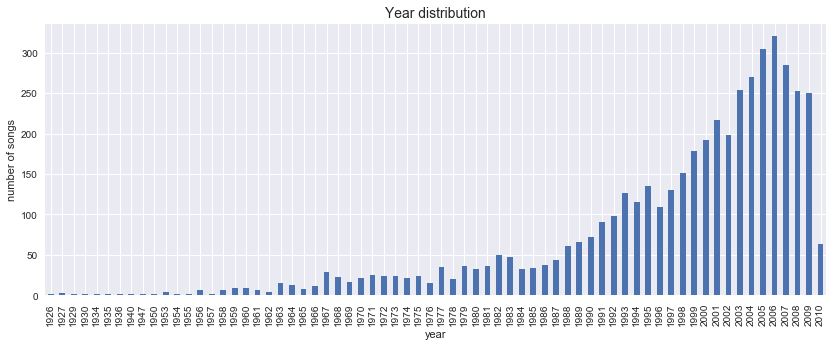

In [124]:
ax = data[data['year'] > 0]['year'].value_counts()\
                                   .sort_index()\
                                   .plot(kind='bar',
                                         grid=True,
                                         figsize=(14, 5));
        
ax.set_title('Year distribution', fontsize=14)
ax.set_xlabel('year')
ax.set_ylabel('number of songs');

Most of the songs we are going to deal with came out in 2000 and later. Hopefully, the ones which were popular in 2011, when the Million Song Dataset was created, remain so to these days. Otherwise, predicting the 2018's best hit might prove more challenging than expected!

#### Song hotttnesss

In [125]:
describe(data, 'song hotttnesss', False)

,song hotttnesss
count,4214.000000
mean,0.459482
std,0.168239
min,0.187895
25%,0.313562
50%,0.450762
75%,0.586366
max,1.000000


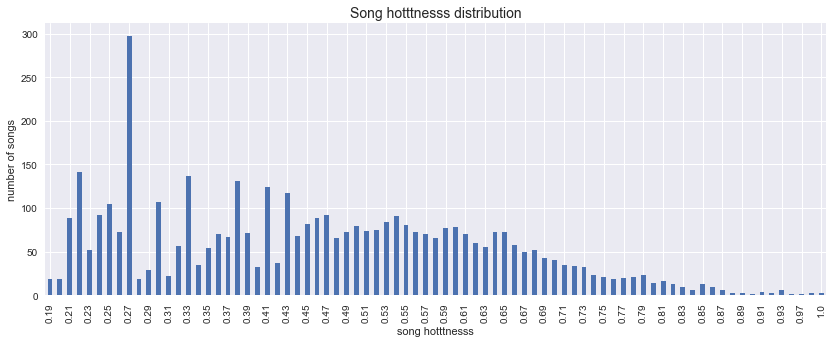

In [150]:
#round the 'song hotttnesss' to the nearest hundredth, in order to limit the number of buckets
ax = round(data[data['song hotttnesss'] > 0]['song hotttnesss'], 2).value_counts()\
                                                                   .sort_index()\
                                                                   .plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(14, 5));

ax.set_title('Song hotttnesss distribution', fontsize=14)
ax.set_xlabel('song hotttnesss')
ax.set_ylabel('number of songs');
set_ticks_wtih_step(ax, 2)

*Unknown ditribution...*

#### Artist hotttnesss

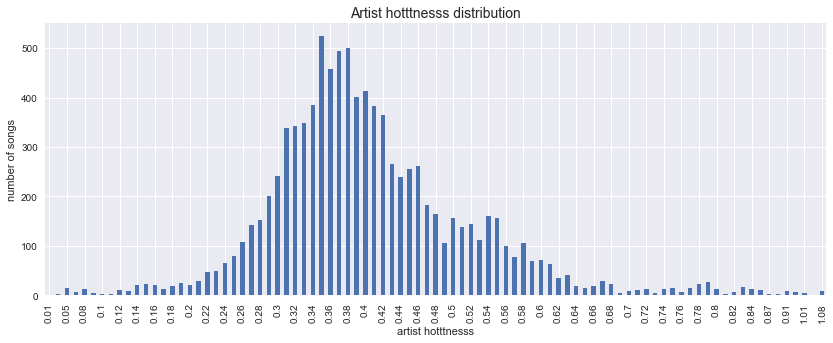

In [143]:
#round the 'song hotttnesss' to the nearest hundredth, in order to limit the number of buckets
ax = round(data[data['artist hotttnesss'] > 0]['artist hotttnesss'], 2).value_counts()\
                                                                       .sort_index()\
                                                                       .plot(kind='bar',
                                                                             grid=True,
                                                                             figsize=(14, 5));
ax.set_title('Artist hotttnesss distribution', fontsize=14)
ax.set_xlabel('artist hotttnesss')
ax.set_ylabel('number of songs');
set_ticks_wtih_step(ax, 2)

*Oh....! Gaussian-like distribution...! ... or is it lognormal...?*

#### Song duration

In [33]:
data['duration'].head()

0    218.93179
1    148.03546
2    177.47546
3    233.40363
4    209.60608
Name: duration, dtype: float64

In [67]:
int(data['duration'].max())

1819

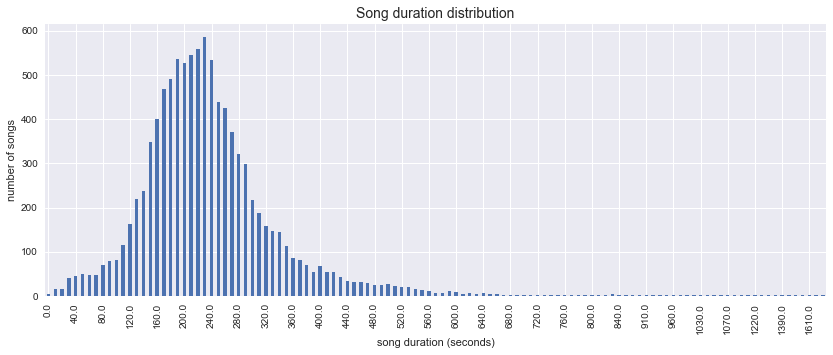

In [146]:
ax = round(data['duration'], -1).value_counts()\
                                .sort_index()\
                                .plot(kind='bar', 
                                      grid=True,
                                      figsize=(14, 5));
        
ax.set_title('Song duration distribution', fontsize=14)
ax.set_xlabel('song duration (seconds)')
ax.set_ylabel('number of songs')
set_ticks_wtih_step(ax, 4)

*Lognormal? Gamma? Weibull?*

Probably a lognormal distribution, as many natural phenomenons related to some *length* - like a song duration - have been observed to follow a lognormal ditribution.

#### Non-evaluated features

Unfortunately, some features such as `energy` or `danceability` happen to not have been evaluated for any of the songs in the dataset. This means we will not be able to use them in our analysis.

In [153]:
describe(data, 'energy', True)

,energy
count,10000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [259]:
describe(data, 'danceability', True)

,danceability
count,10000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#### Artist terms

In [22]:
#prevents running the tranformation of 'artist terms' from string to list twice
if(type(data['artist terms'].head(1)[0]) == str):    
    data['artist terms'] = string_to_string_array(data, 'artist terms')

In [23]:
top_list = data['artist terms']
artist_terms_all = [item for sublist in top_list for item in sublist]
artist_terms_distinct = set(artist_terms_all)

print('Total number of artist terms:', len(artist_terms_all))
print('Number of distinct artist terms:', len(artist_terms_distinct))

Total number of artist terms: 263967
Number of distinct artist terms: 3896


In [24]:
serie = pd.Series(artist_terms_all).value_counts()

In [25]:
serie.sort_values(ascending=False).head(10)

rock                6435
pop                 5439
electronic          4378
jazz                3563
united states       3056
hip hop             2849
alternative rock    2733
folk                2591
alternative         2582
soul                2450
dtype: int64

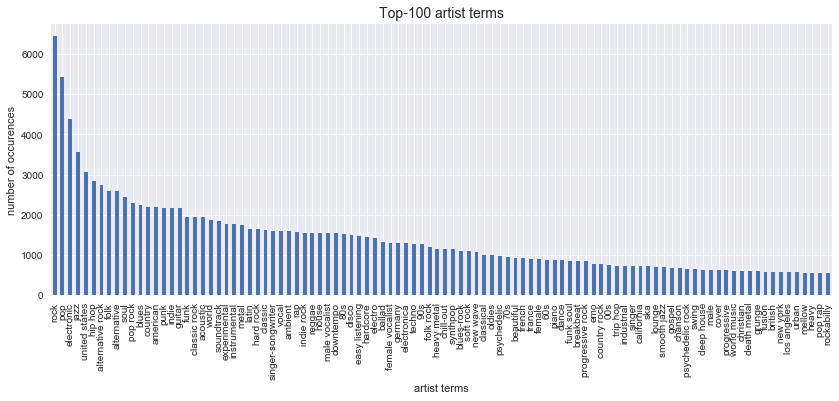

In [26]:
top = 100
ax = serie.sort_values(ascending=False).head(top)\
                                       .plot(kind='bar',
                                             grid=True,
                                             figsize=(14, 5));
    
ax.set_title('Top-' + str(top) + ' artist terms', fontsize=14)
ax.set_xlabel('artist terms')
ax.set_ylabel('number of occurences');

It would seem the songs in this dataset are heavily rock and pop oriented. (and western oriented too)

#### Beats

In [6]:
#prevents running the tranformation of 'beats start' from string to list twice
if(type(data['beats start'].head(1)[0]) == str):    
    data['beats start'] = string_to_float_array(data[data['beats start'] != '[]'], 'beats start')

ValueError: Length of values does not match length of index

In [ ]:
serie = data['beats start'].head(1)

In [45]:
ax = serie.plot(grid=True, figsize=(14, 5));
    
ax.set_title('Top-' + str(top) + ' artist terms', fontsize=14)
ax.set_xlabel('artist terms')
ax.set_ylabel('number of occurences');

TypeError: Empty 'DataFrame': no numeric data to plot

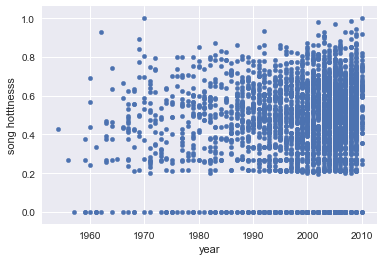

In [410]:
data[data['year'] != 0].plot(kind='scatter', x='year', y='song hotttnesss')

In [514]:
data[data['song hotttnesss'] > 0.9]['artist terms'].sort_values(ascending=False)

1160    [teen pop, pop punk, pop rock, punk, pop, fema...
2431    [southern rock, alternative rock, rock, nashvi...
1427    [rock, singer-songwriter, folk, soundtrack, mo...
2109    [reggae, hip hop, pop, jamaica, dancehall, rap...
2351    [rap rock, funk metal, funk rock, heavy metal,...
1208    [pop rock, all-female, ballad, europop, doo-wo...
1594    [pop punk, punk, pop, punk pop, emo pop, emo, ...
5699    [pop, rock, alternative, modern rock, clu pop ...
5355    [neo soul, blues, soul, pop, urban, new york, ...
6482    [jazz rap, hip hop, neo soul, chill-out, turna...
539     [jazz funk, soul jazz, bossa nova, funk, chica...
3277    [indie rock, rock, pop, alternative, alternati...
3544    [experimental rock, post rock, progressive met...
7917    [experimental rock, post rock, progressive met...
6437    [dirty south rap, hard rock, hip hop, rap, roc...
9137    [blues-rock, heavy metal, hard rock, classic r...
9724    [blues-rock, garage rock, blues, alternative r...
1354    [art r

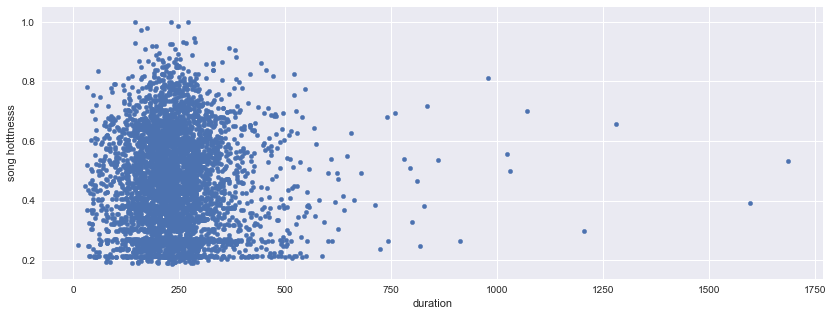

In [53]:
data[data['song hotttnesss'] != 0].plot(kind='scatter', x='duration', y='song hotttnesss', figsize=(14,5));

In [147]:
#data['artist terms']

In [477]:
data['beats start'].head(1)[0]

'[   0.58521    1.19196    1.78893    2.37813    2.94247    3.50622\n    4.05077    4.56902    5.14371    5.76504    6.41767    7.08552\n    7.74554    8.40279    9.05841    9.70913   10.36149   11.01057\n   11.66783   12.32182   12.98399   13.63798   14.28872   14.94762\n   15.59835   16.25463   16.9132    17.56272   18.21002   18.85198\n   19.50271   20.16161   20.81724   21.47124   22.12232   22.76883\n   23.41491   24.07314   24.72931   25.381     26.053     26.75695\n   27.28786   27.82394   28.3656    28.90727   29.56053   30.13608\n   30.65717   31.17374   31.67335   32.15958   32.62496   33.17838\n   33.82211   34.47504   35.13502   35.7874    36.44331   37.10017\n   37.74491   38.39728   39.04965   39.70366   40.35113   41.01003\n   41.66893   42.32214   42.9643    43.61667   44.26169   44.91089\n   45.5717    46.2311    46.88745   47.54129   48.18394   48.84123\n   49.50972   50.1248    50.6717    51.22026   51.76914   52.41008\n   53.05048   53.7015    54.3454    54.98674   

In [20]:
all_getters

['get_num_songs',
 'get_artist_familiarity',
 'get_artist_hotttnesss',
 'get_artist_id',
 'get_artist_mbid',
 'get_artist_playmeid',
 'get_artist_7digitalid',
 'get_artist_latitude',
 'get_artist_longitude',
 'get_artist_location',
 'get_artist_name',
 'get_release',
 'get_release_7digitalid',
 'get_song_id',
 'get_song_hotttnesss',
 'get_title',
 'get_track_7digitalid',
 'get_similar_artists',
 'get_artist_terms',
 'get_artist_terms_freq',
 'get_artist_terms_weight',
 'get_analysis_sample_rate',
 'get_audio_md5',
 'get_danceability',
 'get_duration',
 'get_end_of_fade_in',
 'get_energy',
 'get_key',
 'get_key_confidence',
 'get_loudness',
 'get_mode',
 'get_mode_confidence',
 'get_start_of_fade_out',
 'get_tempo',
 'get_time_signature',
 'get_time_signature_confidence',
 'get_track_id',
 'get_segments_start',
 'get_segments_confidence',
 'get_segments_pitches',
 'get_segments_timbre',
 'get_segments_loudness_max',
 'get_segments_loudness_max_time',
 'get_segments_loudness_start',
 'ge